***Data set load& save***

# **MileStone 1 Begins**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Mount Google Drive to access your files
from google.colab import drive
drive.mount('/content/drive')

# Define the file path to your raw dataset
path = "/content/drive/MyDrive/flights_sample_3m.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(path, low_memory=False)

print("✅ Raw dataset loaded successfully!")
print("\nInitial DataFrame Info:")
df.info()

print("\nInitial DataFrame Head:")
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Raw dataset loaded successfully!

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN  

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN


**Trim the Dataset**

In [2]:
# Keep only the essential columns (25 raw columns)
keep_cols = [
    "FL_DATE", "AIRLINE", "FL_NUMBER", "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", "DISTANCE",
    "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY",
    "CRS_ELAPSED_TIME", "ELAPSED_TIME", "AIR_TIME",
    "CANCELLED", "CANCELLATION_CODE", "DIVERTED",
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"
]

df = df[keep_cols].copy()

print("✅ Dataset trimmed successfully!")
print("Trimmed dataset shape:", df.shape)
df.head(3)

✅ Dataset trimmed successfully!
Trimmed dataset shape: (3000000, 25)


,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,ELAPSED_TIME,AIR_TIME,CANCELLED,CANCELLATION_CODE,DIVERTED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,1155,1151.0,...,176.0,153.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,2120,2114.0,...,236.0,189.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,954,1000.0,...,112.0,87.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Time Conversion

In [3]:
# Assuming your 'df' DataFrame is already loaded with 25 raw columns.

# Fill missing numerical values with 0
df = df.fillna(0)

# Convert and format time columns
# Define a function for time conversion
def format_time_to_am_pm(time_float):
    if time_float == 2400.0:
        time_float = 0.0
    try:
        time_str = f"{int(time_float):04d}"
        dt_obj = datetime.strptime(time_str, '%H%M')
        return dt_obj.strftime('%I:%M %p')
    except (ValueError, TypeError):
        return None

df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_time_to_am_pm)
df['DEP_TIME'] = df['DEP_TIME'].apply(format_time_to_am_pm)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(format_time_to_am_pm)
df['ARR_TIME'] = df['ARR_TIME'].apply(format_time_to_am_pm)
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors="coerce")

print("✅ Data cleaning and time conversion complete!")
df.info()

✅ Data cleaning and time conversion complete!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   FL_NUMBER                int64         
 3   ORIGIN                   object        
 4   ORIGIN_CITY              object        
 5   DEST                     object        
 6   DEST_CITY                object        
 7   DISTANCE                 float64       
 8   CRS_DEP_TIME             object        
 9   DEP_TIME                 object        
 10  DEP_DELAY                float64       
 11  CRS_ARR_TIME             object        
 12  ARR_TIME                 object        
 13  ARR_DELAY                float64       
 14  CRS_ELAPSED_TIME         float64       
 15  ELAPSED_TIME             float64       
 16  AIR_TIME                 f

In [4]:
df.shape

(3000000, 25)

# **Feature Engineering and Delay Time**

In [5]:
# Assuming your 'df' DataFrame has been cleaned in the previous cell.

# 1. Create new features
df["Year"] = df["FL_DATE"].dt.year
df["Month"] = df["FL_DATE"].dt.month
df["WeekdayName"] = df["FL_DATE"].dt.day_name()
df["DepHour"] = df["CRS_DEP_TIME"].apply(lambda x: pd.to_datetime(x, format='%I:%M %p', errors='coerce').hour if pd.notna(x) else None)

df["Route"] = df["ORIGIN"].astype(str) + " → " + df["DEST"].astype(str)
df["CityPair"] = df["ORIGIN_CITY"].astype(str) + " → " + df["DEST_CITY"].astype(str)
df["SCHED_BLOCK_MIN"] = df["CRS_ELAPSED_TIME"]
df["ACT_BLOCK_MIN"] = df["ELAPSED_TIME"]

# 2. Consolidate delay columns
delay_cols_to_replace = [
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"
]

df['delay_reason'] = np.where(df[delay_cols_to_replace].gt(0).any(axis=1),
                              np.where(df["DELAY_DUE_CARRIER"] > 0, "DELAY_DUE_CARRIER",
                                       np.where(df["DELAY_DUE_WEATHER"] > 0, "DELAY_DUE_WEATHER",
                                                np.where(df["DELAY_DUE_NAS"] > 0, "DELAY_DUE_NAS",
                                                         np.where(df["DELAY_DUE_SECURITY"] > 0, "DELAY_DUE_SECURITY",
                                                                  "DELAY_DUE_LATE_AIRCRAFT")))),
                              "No Delay")

df['delay_time'] = df[delay_cols_to_replace].max(axis=1)

df = df.drop(columns=delay_cols_to_replace)

print("✅ Feature engineering and delay consolidation complete!")
df.info()

✅ Feature engineering and delay consolidation complete!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object        
 13  ARR_DELAY          float64       
 14  CRS_ELAPSED_TIME   float64       
 15  ELAPSED_TIME       float64       
 16  AIR_TIME           float64       
 17  CANCELLED          float64       
 18  CANCELLATION_CODE  object        
 19  DIVERTE

In [6]:
df.head(5)

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,Year,Month,WeekdayName,DepHour,Route,CityPair,SCHED_BLOCK_MIN,ACT_BLOCK_MIN,delay_reason,delay_time
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,11:55 AM,11:51 AM,...,2019,1,Wednesday,11,FLL → EWR,"Fort Lauderdale, FL → Newark, NJ",186.0,176.0,No Delay,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,09:20 PM,09:14 PM,...,2022,11,Saturday,21,MSP → SEA,"Minneapolis, MN → Seattle, WA",235.0,236.0,No Delay,0.0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,09:54 AM,10:00 AM,...,2022,7,Friday,9,DEN → MSP,"Denver, CO → Minneapolis, MN",118.0,112.0,No Delay,0.0
3,2023-03-06,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1589.0,04:09 PM,04:08 PM,...,2023,3,Monday,16,MSP → SFO,"Minneapolis, MN → San Francisco, CA",260.0,285.0,DELAY_DUE_NAS,24.0
4,2020-02-23,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",985.0,06:40 PM,06:38 PM,...,2020,2,Sunday,18,MCO → DFW,"Orlando, FL → Dallas/Fort Worth, TX",181.0,182.0,No Delay,0.0


**Final missing values check**

In [7]:
# % of missing values
missing = (df.isna().sum()/len(df)*100).sort_values(ascending=False).round(2)
missing[missing > 0]


,0


In [8]:
import pandas as pd
import numpy as np

# Keep cancelled/diverted flights, only drop rows where times are missing for non-cancelled flights
df_clean = df[
    (df["CANCELLED"] == 1) |
    (df["DIVERTED"] == 1) |
    (~df["DEP_DELAY"].isna() & ~df["ARR_DELAY"].isna())
].copy()

print("Original shape:", df.shape)
print("After smart cleaning shape:", df_clean.shape)

# Check cancellation/diversion rates again
print("\nCancellation rate:", df_clean["CANCELLED"].mean()*100, "%")
print

Original shape: (3000000, 30)
After smart cleaning shape: (3000000, 30)

Cancellation rate: 2.638 %


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object        
 13  ARR_DELAY          float64       
 14  CRS_ELAPSED_TIME   float64       
 15  ELAPSED_TIME       float64       
 16  AIR_TIME           float64       
 17  CANCELLED          float64       
 18  CANCELLATION_CODE  object        
 19  DIVERTED           float64       
 20  Year               int32

# saving DF data frame also **END of Milestone !**

In [10]:
import pandas as pd
import numpy as np

# --- Milestone 1: Final Cleaning and Saving ---

# Keep cancelled/diverted flights, only drop rows where times are missing for non-cancelled flights
df_clean = df[
    (df["CANCELLED"] == 1) |
    (df["DIVERTED"] == 1) |
    (~df["DEP_DELAY"].isna() & ~df["ARR_DELAY"].isna())
].copy()

print("Original shape:", df.shape)
print("After smart cleaning shape:", df_clean.shape)

# Save the cleaned dataset to Drive
from google.colab import drive
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/flights_cleaned.csv"
df_clean.to_csv(save_path, index=False)

print(f"\n✅ Cleaned dataset saved to: {save_path}")
print("Final DataFrame info after cleaning:")
df_clean.info()

print("\nFinal DataFrame head with new columns:")
df_clean.head()

Original shape: (3000000, 30)
After smart cleaning shape: (3000000, 30)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Cleaned dataset saved to: /content/drive/MyDrive/flights_cleaned.csv
Final DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object 

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,Year,Month,WeekdayName,DepHour,Route,CityPair,SCHED_BLOCK_MIN,ACT_BLOCK_MIN,delay_reason,delay_time
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,11:55 AM,11:51 AM,...,2019,1,Wednesday,11,FLL → EWR,"Fort Lauderdale, FL → Newark, NJ",186.0,176.0,No Delay,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,09:20 PM,09:14 PM,...,2022,11,Saturday,21,MSP → SEA,"Minneapolis, MN → Seattle, WA",235.0,236.0,No Delay,0.0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,09:54 AM,10:00 AM,...,2022,7,Friday,9,DEN → MSP,"Denver, CO → Minneapolis, MN",118.0,112.0,No Delay,0.0
3,2023-03-06,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1589.0,04:09 PM,04:08 PM,...,2023,3,Monday,16,MSP → SFO,"Minneapolis, MN → San Francisco, CA",260.0,285.0,DELAY_DUE_NAS,24.0
4,2020-02-23,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",985.0,06:40 PM,06:38 PM,...,2020,2,Sunday,18,MCO → DFW,"Orlando, FL → Dallas/Fort Worth, TX",181.0,182.0,No Delay,0.0


# **saving data frame for MileStone 2 **

In [11]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/flights_cleaned.csv"
df_clean = pd.read_csv(save_path, parse_dates=["FL_DATE"])

print("✅ Cleaned dataset reloaded successfully!")
df_clean.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned dataset reloaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object        
 13  ARR_DELAY          float64       
 14  CRS_ELAPSED_TIME   float64       
 15  ELAPSED_TIME       float64       
 16  AIR_TIME  

In [12]:
df_clean.head(15)

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,Year,Month,WeekdayName,DepHour,Route,CityPair,SCHED_BLOCK_MIN,ACT_BLOCK_MIN,delay_reason,delay_time
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,11:55 AM,11:51 AM,...,2019,1,Wednesday,11,FLL → EWR,"Fort Lauderdale, FL → Newark, NJ",186.0,176.0,No Delay,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,09:20 PM,09:14 PM,...,2022,11,Saturday,21,MSP → SEA,"Minneapolis, MN → Seattle, WA",235.0,236.0,No Delay,0.0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,09:54 AM,10:00 AM,...,2022,7,Friday,9,DEN → MSP,"Denver, CO → Minneapolis, MN",118.0,112.0,No Delay,0.0
3,2023-03-06,Delta Air Lines Inc.,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1589.0,04:09 PM,04:08 PM,...,2023,3,Monday,16,MSP → SFO,"Minneapolis, MN → San Francisco, CA",260.0,285.0,DELAY_DUE_NAS,24.0
4,2020-02-23,Spirit Air Lines,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",985.0,06:40 PM,06:38 PM,...,2020,2,Sunday,18,MCO → DFW,"Orlando, FL → Dallas/Fort Worth, TX",181.0,182.0,No Delay,0.0
5,2019-07-31,Southwest Airlines Co.,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",181.0,10:10 AM,12:37 PM,...,2019,7,Wednesday,10,DAL → OKC,"Dallas, TX → Oklahoma City, OK",60.0,54.0,DELAY_DUE_CARRIER,141.0
6,2023-06-11,American Airlines Inc.,2134,DCA,"Washington, DC",BOS,"Boston, MA",399.0,10:10 AM,10:01 AM,...,2023,6,Sunday,10,DCA → BOS,"Washington, DC → Boston, MA",109.0,89.0,No Delay,0.0
7,2019-07-08,Republic Airline,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",613.0,04:43 PM,04:37 PM,...,2019,7,Monday,16,HSV → DCA,"Huntsville, AL → Washington, DC",122.0,151.0,DELAY_DUE_NAS,23.0
8,2023-02-12,Spirit Air Lines,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",1379.0,05:30 AM,05:27 AM,...,2023,2,Sunday,5,IAH → LAX,"Houston, TX → Los Angeles, CA",227.0,219.0,No Delay,0.0
9,2020-08-22,Alaska Airlines Inc.,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",1533.0,09:25 PM,09:16 PM,...,2020,8,Saturday,21,SEA → FAI,"Seattle, WA → Fairbanks, AK",210.0,220.0,No Delay,0.0


# **MileStone 2 Begins**

***cleaned dataset loading ***

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access your files
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your cleaned dataset
path = "/content/drive/MyDrive/flights_cleaned.csv"

# Load the cleaned dataset into a DataFrame
df_clean = pd.read_csv(path, parse_dates=["FL_DATE"])

print("✅ Cleaned dataset reloaded successfully!")
print("DataFrame Info:")
df_clean.info()

print("\nDataFrame Head:")
df_clean.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned dataset reloaded successfully!
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object        
 13  ARR_DELAY          float64       
 14  CRS_ELAPSED_TIME   float64       
 15  ELAPSED_TIME       float64       

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,Year,Month,WeekdayName,DepHour,Route,CityPair,SCHED_BLOCK_MIN,ACT_BLOCK_MIN,delay_reason,delay_time
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,11:55 AM,11:51 AM,...,2019,1,Wednesday,11,FLL → EWR,"Fort Lauderdale, FL → Newark, NJ",186.0,176.0,No Delay,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,09:20 PM,09:14 PM,...,2022,11,Saturday,21,MSP → SEA,"Minneapolis, MN → Seattle, WA",235.0,236.0,No Delay,0.0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,09:54 AM,10:00 AM,...,2022,7,Friday,9,DEN → MSP,"Denver, CO → Minneapolis, MN",118.0,112.0,No Delay,0.0


# **Total Flights by Year,Month,Day (2019-2023)*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


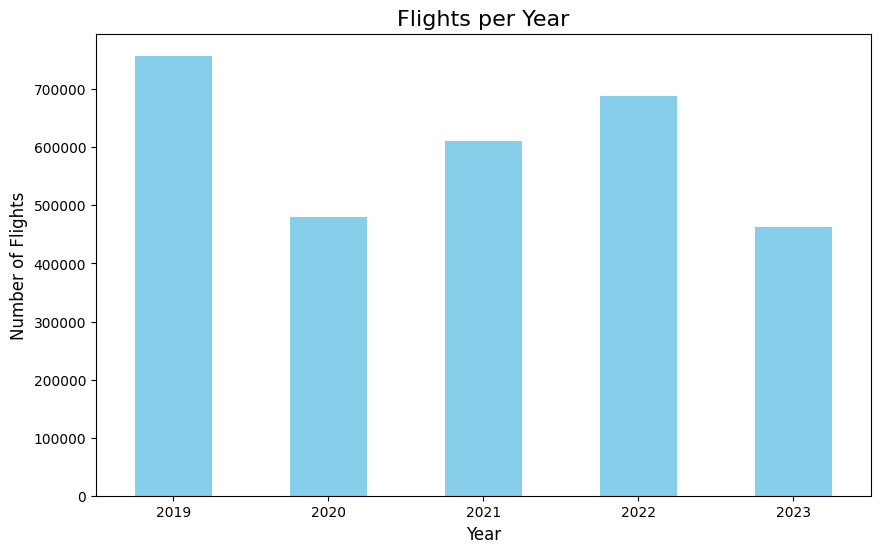

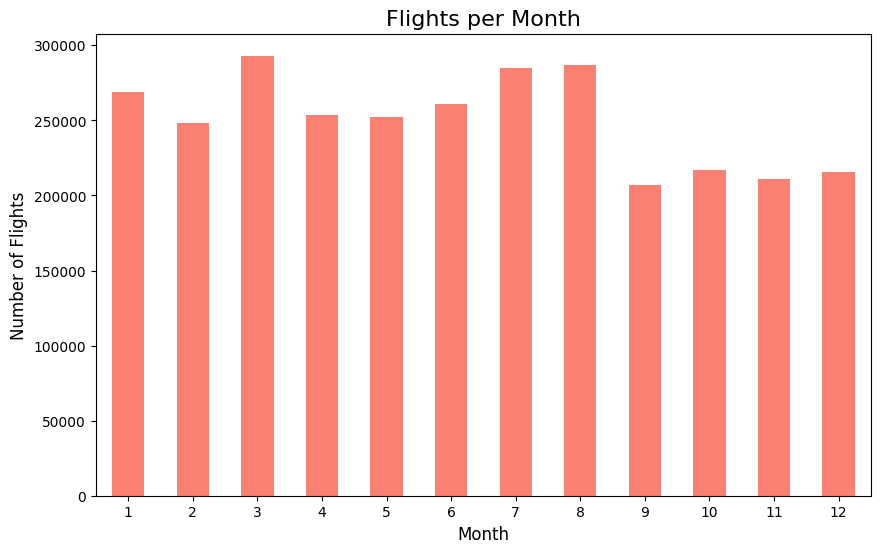

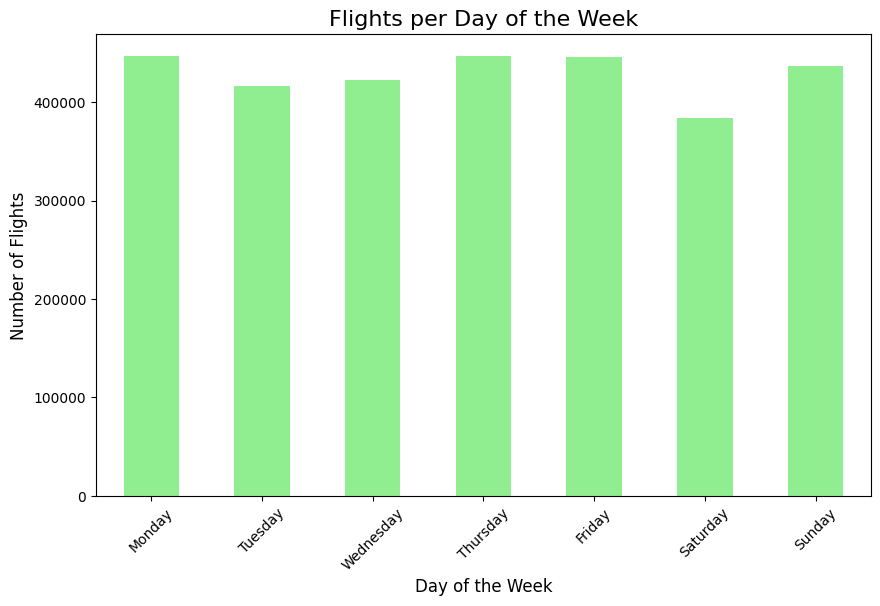

✅ The first 3 graphs have been created!


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive and load the cleaned dataset to start Milestone 2
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/flights_cleaned.csv"
df_clean = pd.read_csv(path, parse_dates=["FL_DATE"])

# --- Graphs ---

# Graph 1: Flights per Year (Bar Chart)
plt.figure(figsize=(10, 6))
yearly = df_clean['Year'].value_counts().sort_index()
yearly.plot(kind='bar', color='skyblue')
plt.title('Flights per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Graph 2: Flights per Month (Bar Chart)
plt.figure(figsize=(10, 6))
monthly = df_clean['Month'].value_counts().sort_index()
monthly.plot(kind='bar', color='salmon')
plt.title('Flights per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Graph 3: Flights per Day of the Week (Bar Chart)
plt.figure(figsize=(10, 6))
daily = df_clean['WeekdayName'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
daily.plot(kind='bar', color='lightgreen')
plt.title('Flights per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("✅ The first 3 graphs have been created!")

# **Top 10 busiest Airlines,Routes**

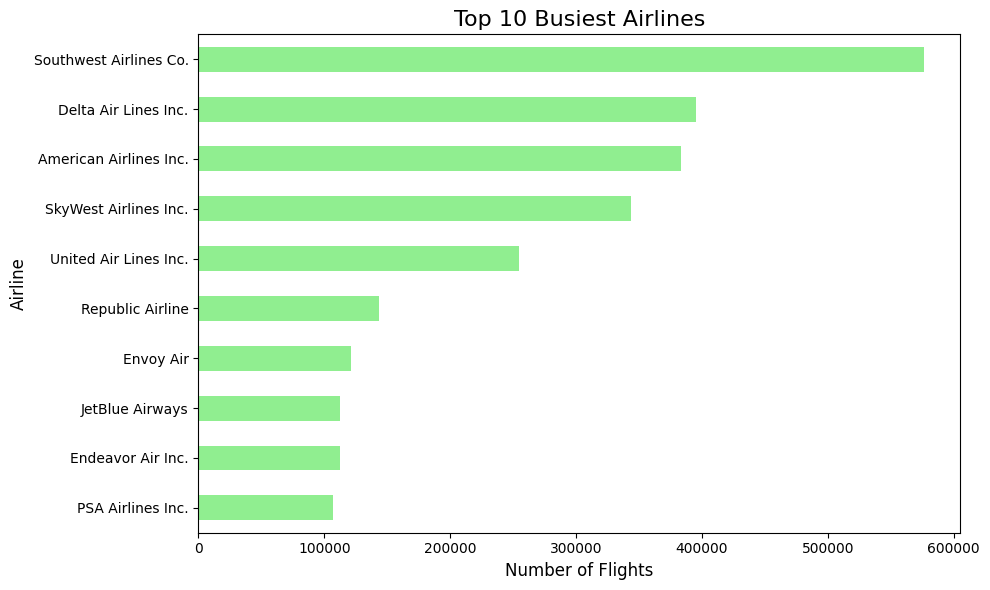

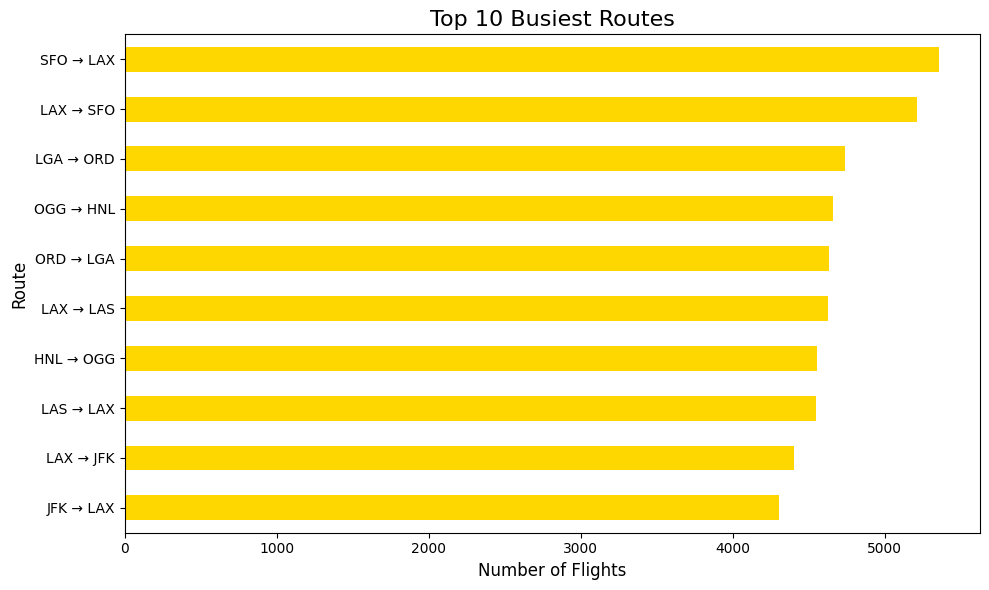

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Top 10 Busiest Airlines (Bar Chart)
plt.figure(figsize=(10, 6))
top_airlines = df_clean['AIRLINE'].value_counts().head(10)
top_airlines.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Busiest Airlines', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. Top 10 Busiest Routes (Bar Chart)
plt.figure(figsize=(10, 6))
top_routes = df_clean['Route'].value_counts().head(10)
top_routes.plot(kind='barh', color='gold')
plt.title('Top 10 Busiest Routes', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **Avg Arrival Delay by Departure Hour**

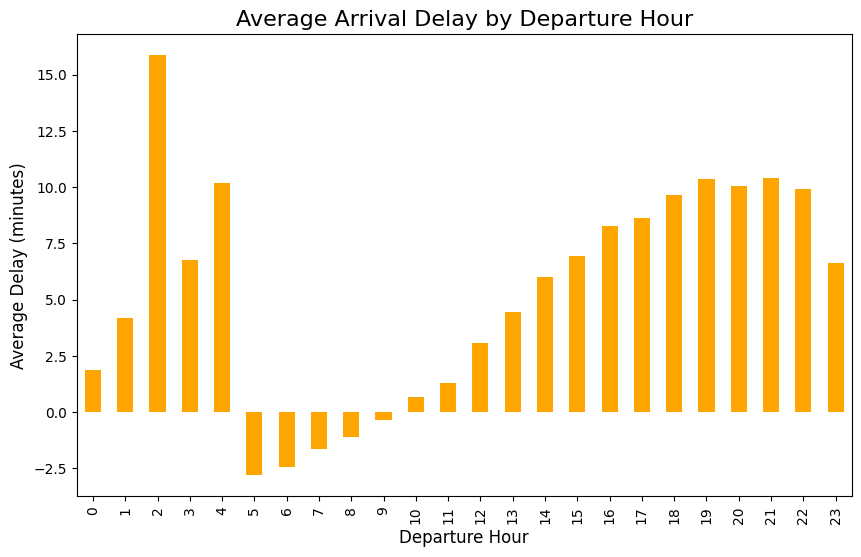

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Avg Arrival Delay by Departure Hour (Bar Chart)
plt.figure(figsize=(10, 6))
delay_by_hour = df_clean.groupby('DepHour')['ARR_DELAY'].mean()
delay_by_hour.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay by Departure Hour', fontsize=16)
plt.xlabel('Departure Hour', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.show()

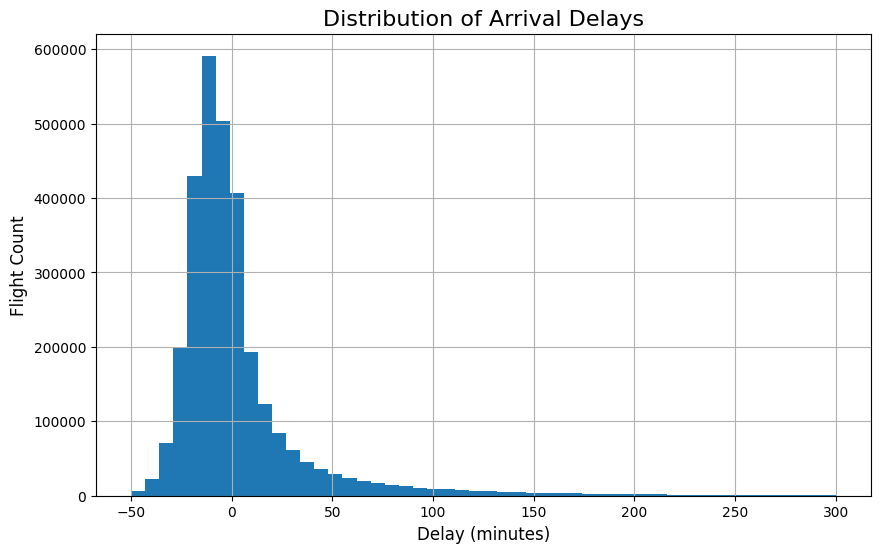

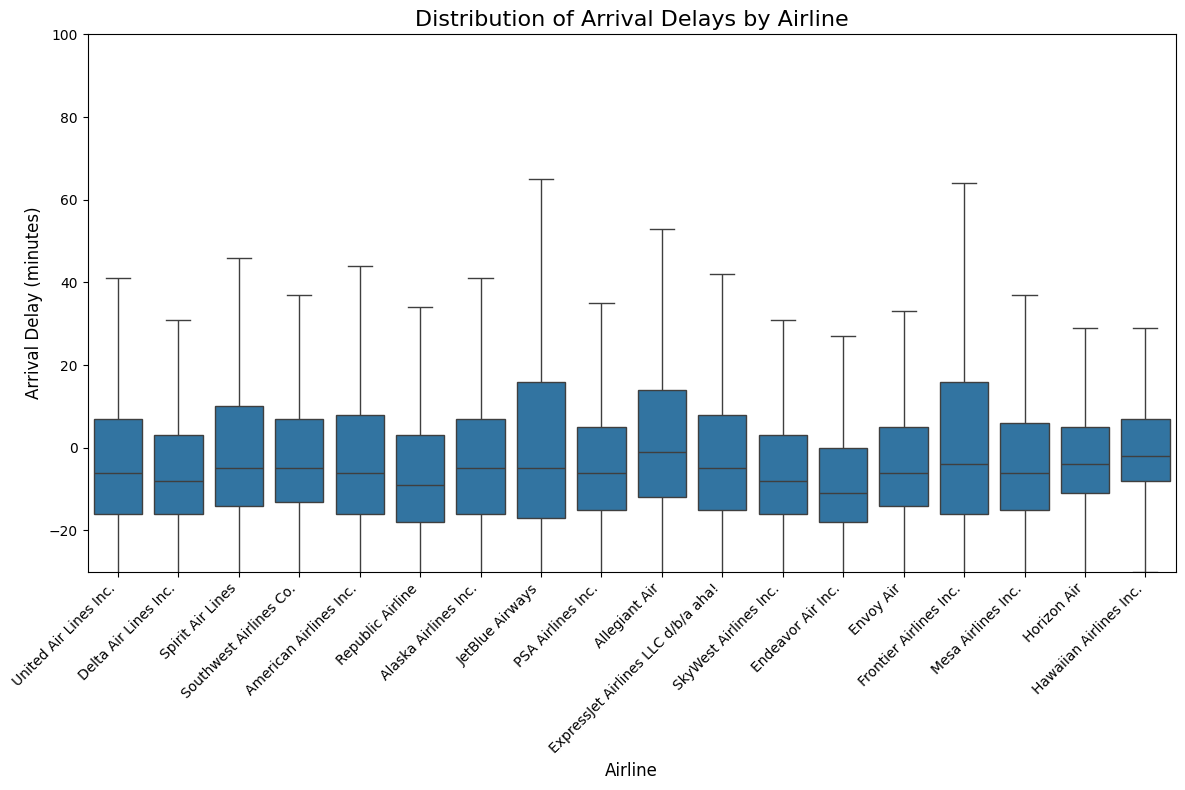

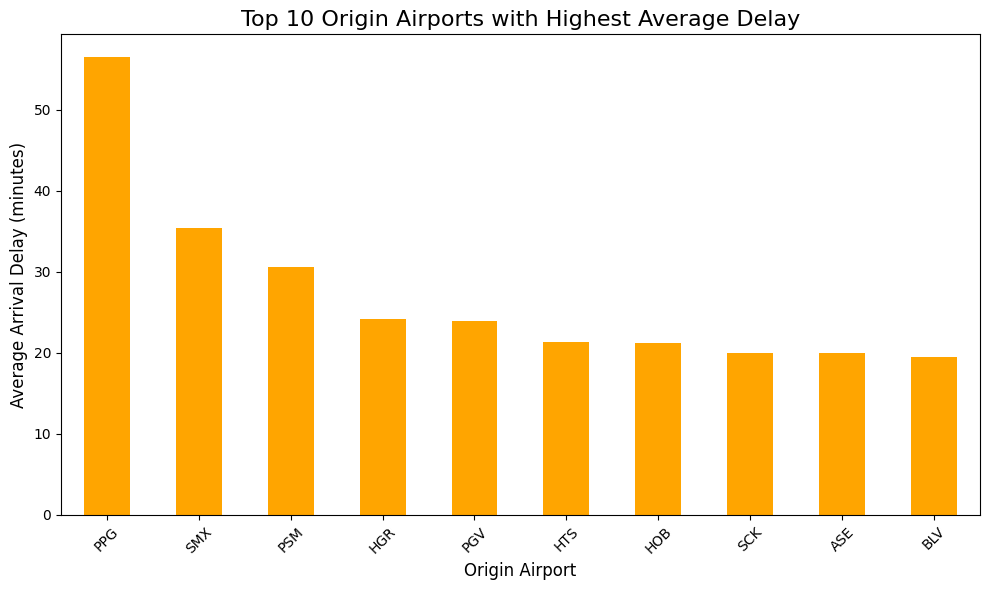

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Distribution of Arrival Delays (Histogram)
plt.figure(figsize=(10, 6))
df_clean['ARR_DELAY'].hist(bins=50, range=(-50, 300))
plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Delay (minutes)', fontsize=12)
plt.ylabel('Flight Count', fontsize=12)
plt.show()


import seaborn as sns

# Create a boxplot to show the distribution of arrival delays across airlines
plt.figure(figsize=(12, 8))
sns.boxplot(x='AIRLINE', y='ARR_DELAY', data=df_clean, showfliers=False)
plt.ylim(-30, 100) # Set a reasonable limit to focus on typical delays
plt.title('Distribution of Arrival Delays by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Top 10 Origin Airports with Highest Average Delay (Bar Chart)
plt.figure(figsize=(10, 6))
origin_delay = df_clean.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values(ascending=False).head(10)
origin_delay.plot(kind='bar', color='orange')
plt.title('Top 10 Origin Airports with Highest Average Delay', fontsize=16)
plt.xlabel('Origin Airport', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1121013579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_by_airline.index, y=cancel_by_airline.values, palette='viridis')


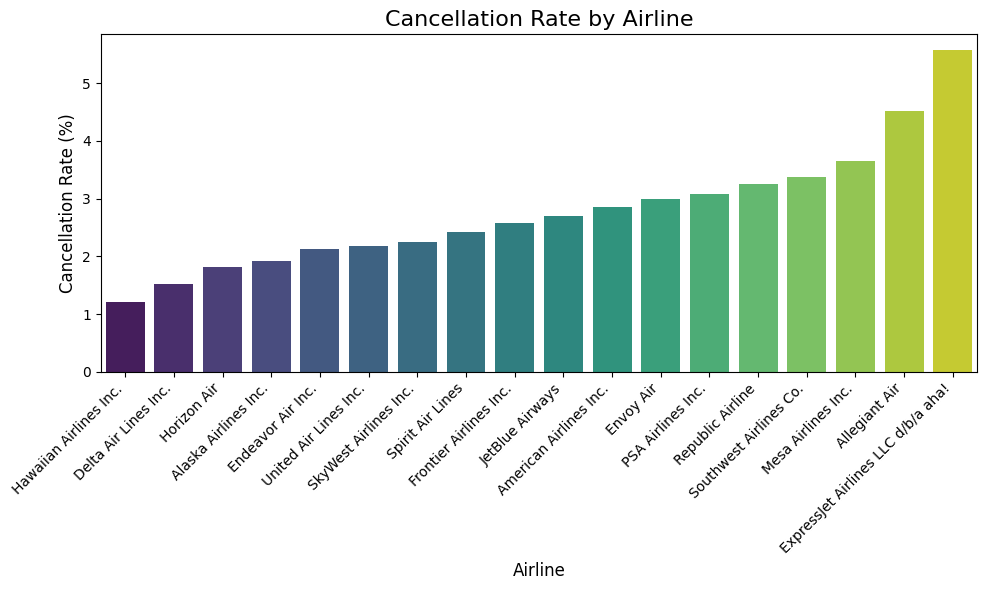

/tmp/ipython-input-1121013579.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_cause.index, y=delay_by_cause.values, palette='plasma')


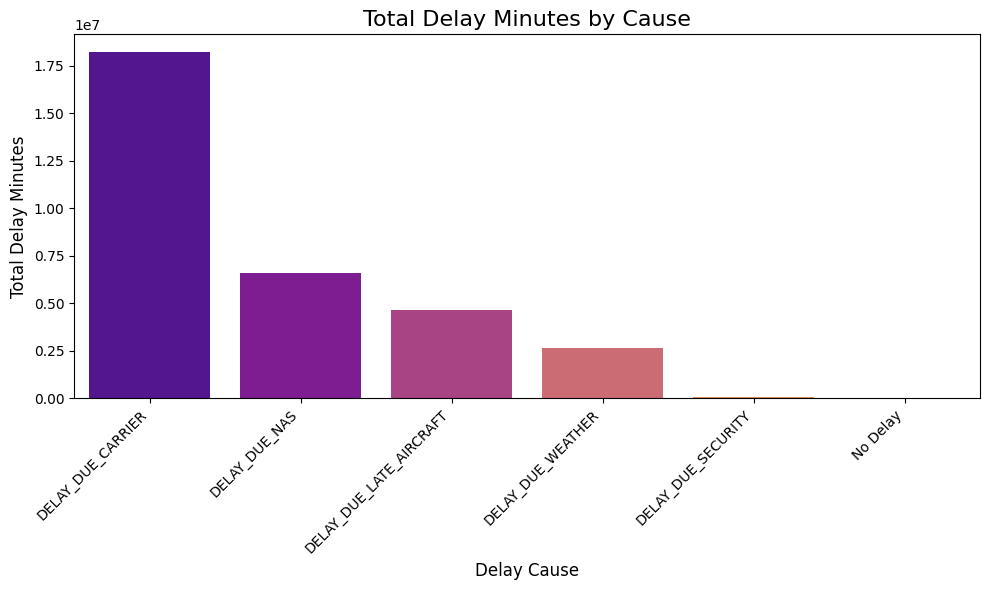

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cancellation Rate by Airline (Bar Chart)
plt.figure(figsize=(10, 6))
cancel_by_airline = df_clean.groupby('AIRLINE')['CANCELLED'].mean().sort_values() * 100
sns.barplot(x=cancel_by_airline.index, y=cancel_by_airline.values, palette='viridis')
plt.title('Cancellation Rate by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Total Delay Minutes by Cause (Bar Chart)
plt.figure(figsize=(10, 6))
delay_by_cause = df_clean.groupby('delay_reason')['delay_time'].sum().sort_values(ascending=False)
sns.barplot(x=delay_by_cause.index, y=delay_by_cause.values, palette='plasma')
plt.title('Total Delay Minutes by Cause', fontsize=16)
plt.xlabel('Delay Cause', fontsize=12)
plt.ylabel('Total Delay Minutes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Cancellation Reasons**

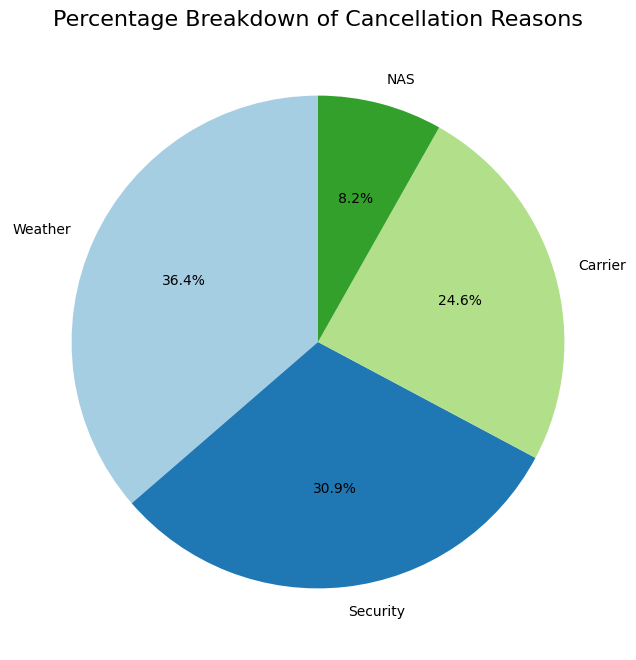

✅ Cancellation reason pie chart created successfully with labels!


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your df_clean DataFrame is already loaded

# Define a dictionary to map the cancellation codes to their meanings
cancellation_codes_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}

# Filter for only cancelled flights
cancelled_flights = df_clean[df_clean['CANCELLED'] == 1].copy()

# Map the cancellation codes to the descriptive names
cancelled_flights['CANCELLATION_CODE'] = cancelled_flights['CANCELLATION_CODE'].map(cancellation_codes_map)

# Count the number of flights for each new cancellation reason
cancellation_counts = cancelled_flights['CANCELLATION_CODE'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Breakdown of Cancellation Reasons', fontsize=16)
plt.show()

print("✅ Cancellation reason pie chart created successfully with labels!")

# *Monthly Cancellation Rate*

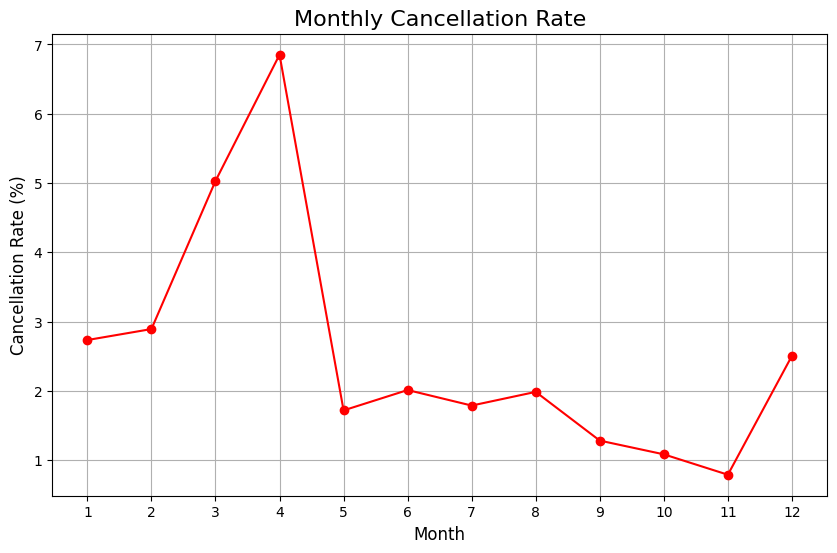

✅ Monthly cancellation rate line plot created successfully!


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_clean is already loaded from the previous cell

# Analyze monthly cancellation trends
monthly_cancellations = df_clean.groupby('Month')['CANCELLED'].sum()
monthly_total_flights = df_clean.groupby('Month')['FL_NUMBER'].count()
monthly_cancel_rate = (monthly_cancellations / monthly_total_flights) * 100

# Plot monthly cancellation rate
plt.figure(figsize=(10, 6))
monthly_cancel_rate.plot(kind='line', marker='o', color='red')
plt.title('Monthly Cancellation Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(np.arange(1, 13, 1))
plt.grid(True)
plt.show()

print("✅ Monthly cancellation rate line plot created successfully!")